In [1]:
# Upload Data
import pandas as pd
var1 = pd.read_csv("products-100.csv")
var1

,Index,Name,Description,Brand,Category,Price,Currency,Stock,EAN,Color,Size,Availability,Internal ID
0,1,Compact Printer Air Advanced Digital,Situation organization these memory much off.,"Garner, Boyle and Flynn",Books & Stationery,265,USD,774,2091465262179,ForestGreen,Large,pre_order,56
1,2,Tablet,Discussion loss politics free one thousand.,Mueller Inc,Shoes & Footwear,502,USD,81,5286196620740,Black,8x10 in,in_stock,29
2,3,Smart Blender Cooker,No situation per.,"Lawson, Keller and Winters",Kitchen Appliances,227,USD,726,1282898648918,SlateGray,XS,in_stock,70
3,4,Advanced Router Rechargeable,For force gas energy six laugh.,Gallagher and Sons,Kitchen Appliances,121,USD,896,3879177514583,PaleGreen,L,discontinued,31
4,5,Portable Mouse Monitor Phone,Feeling back religious however author room sci...,Irwin LLC,Kids' Clothing,1,USD,925,9055773261265,SeaShell,100x200 mm,discontinued,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Router,Investment everything story buy.,Atkinson Inc,Laptops & Computers,375,USD,703,3330396409604,Gainsboro,8x10 in,limited_stock,55
96,97,Fast Thermostat Microphone Scooter,Nature notice themselves news.,Shea Ltd,Beauty & Personal Care,289,USD,727,9265397743935,White,Extra Large,backorder,25
97,98,Eco Heater Toaster Stove Silent Sense,Understand still or summer rule.,West Ltd,Cleaning Supplies,232,USD,998,5505866454530,OldLace,Small,limited_stock,20
98,99,Clean Blender Scale Lite,Final art some push.,"Bell, Gamble and Barrett",Camping & Hiking,241,USD,391,3893594435450,Aquamarine,5x7 in,limited_stock,5


In [2]:
var1.head()

,Index,Name,Description,Brand,Category,Price,Currency,Stock,EAN,Color,Size,Availability,Internal ID
0,1,Compact Printer Air Advanced Digital,Situation organization these memory much off.,"Garner, Boyle and Flynn",Books & Stationery,265,USD,774,2091465262179,ForestGreen,Large,pre_order,56
1,2,Tablet,Discussion loss politics free one thousand.,Mueller Inc,Shoes & Footwear,502,USD,81,5286196620740,Black,8x10 in,in_stock,29
2,3,Smart Blender Cooker,No situation per.,"Lawson, Keller and Winters",Kitchen Appliances,227,USD,726,1282898648918,SlateGray,XS,in_stock,70
3,4,Advanced Router Rechargeable,For force gas energy six laugh.,Gallagher and Sons,Kitchen Appliances,121,USD,896,3879177514583,PaleGreen,L,discontinued,31
4,5,Portable Mouse Monitor Phone,Feeling back religious however author room sci...,Irwin LLC,Kids' Clothing,1,USD,925,9055773261265,SeaShell,100x200 mm,discontinued,10


In [3]:
var1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         100 non-null    int64 
 1   Name          100 non-null    object
 2   Description   100 non-null    object
 3   Brand         100 non-null    object
 4   Category      100 non-null    object
 5   Price         100 non-null    int64 
 6   Currency      100 non-null    object
 7   Stock         100 non-null    int64 
 8   EAN           100 non-null    int64 
 9   Color         100 non-null    object
 10  Size          100 non-null    object
 11  Availability  100 non-null    object
 12  Internal ID   100 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 10.3+ KB


In [4]:
# Show Nan or empty area by columns
var1.isna().sum()


,0
Index,0
Name,0
Description,0
Brand,0
Category,0
Price,0
Currency,0
Stock,0
EAN,0
Color,0


In [5]:
# show total Nan
var1.isna().sum().sum()

np.int64(0)

**Visualizes missing data in  DataFrame.**
*   Each column is on the x-axis.
*   Each row is on the y-axis.
*   Dark squares = missing values
*   Light squares = available values

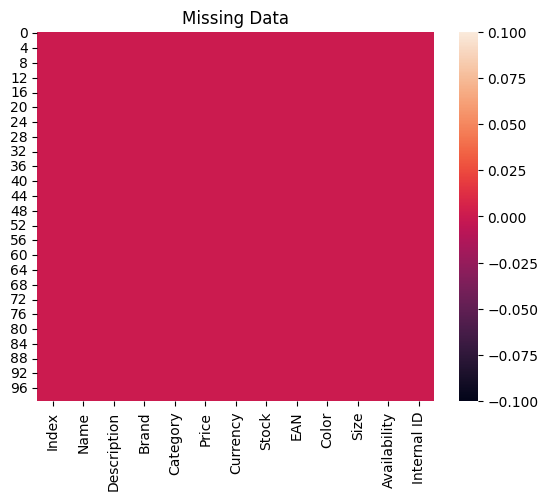

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(var1.isna(),cbar=True)
plt.title("Missing Data")
plt.show()


In [64]:
# these is used in a machine learning workflow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [70]:
# Select Feature and Target
x = var1[['Price']]
y = var1['Stock']

In [71]:
# Train-Test Split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [72]:
# Train Regression + Scaling

model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=20000))
])
model.fit(x_train,y_train)

# Predictions

y_pred = model.predict(x_test)

print("Predicted Valus :", y_pred)
print("Actual Values :", accuracy_score(y_test,y_pred))
print("Confusion Matrix :", confusion_matrix(y_test,y_pred))

x_min = x['Price'].min()
x_max = x['Price'].max()

Predicted Valus : [499 623 732 499 727 623 623 499 499 499 499 732 732 499 499 732 499 499
 623 499 499 499 499 623 732]
Actual Values : 0.0
Confusion Matrix : [[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 

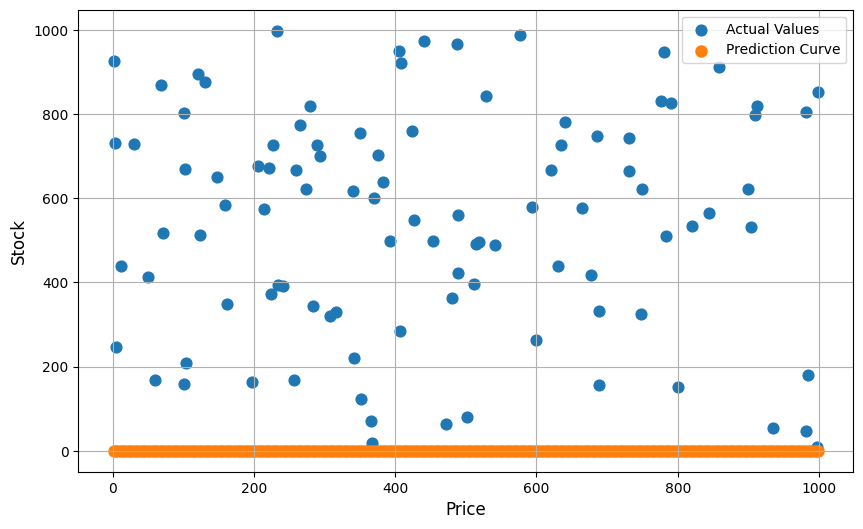

In [73]:

# Graph (Classification Curve)
x_range = np.linspace(x_min, x_max,200).reshape(-1,1)
x_range_var1 = pd.DataFrame(x_range,columns=['Price'])
y_pred = model.predict(x_range_var1 )

y_curve = model.predict_proba(x_range_var1)[:,1]
plt.figure(figsize=(10,6))

# Smooth prediction curve
plt.scatter(x['Price'],y, label = 'Actual Values', s=60)

# Scatter of actual points
plt.scatter(x_range,y_curve, label = 'Prediction Curve', linewidths=3)

plt.xlabel("Price",fontsize=12)
plt.ylabel("Stock",fontsize=12)
plt.legend()
plt.grid(True)
plt.show()